In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import h5py
import umap

In [23]:
## Learning Curve
writing_files = True
if writing_files:
    data = {
        'h3o2-/step': [50, 100, 200, 300, 500, 1000, 1500, 2400],
        'h3o2-/augdz/mae': [70.67388889, 53.80201746, 32.71837083, 23.43430423, 12.00045225, 11.45394807, 6.358336727, 5.274432241],
        'h5o2+/step': [50, 100, 200, 500, 1000, 1500, 2000, 2500, 2900],
        'h5o2+/augdz/mae': [96.63596019, 81.00808848, 39.15759394, 21.2774114, 17.85219934, 13.89083613, 11.82551383, 10.81825958, 11.2812944],
        'h5o2+/augtz/mae': [100.9925936, 79.79447018, 38.72235616, 22.31833722, 18.6175212, 15.06368482, 11.96836712, 10.43919122, 10.60728339],
        'h5o2+/dz/mae': [170.1679216, 119.7511729, 82.15762284, 44.78685526, 29.17118717, 27.49518015, 22.41283481, 20.7573653, 20.42646195],
        'h5o3-/step': [50, 100, 200, 500, 1000, 1500, 2000, 3000, 3900],
        'h5o3-/augdz/mae': [116.8802786, 101.8238346, 56.7880618, 50.71325043, 30.36504475, 27.34868166, 19.98567064, 14.9188312, 11.7080868],
        'h7o4-/step': [50, 100, 200, 500, 1000, 1500, 2000, 3000, 4500, 5900],
        'h7o4-/augdz/mae': [111.2244809, 63.75999818, 38.78929423, 22.47911687, 14.81556994, 10.9837421, 9.027557214, 5.814471098, 4.293949417, 3.064231086]
    }

    # Create an HDF5 file
    with h5py.File('lc_data.h5', 'w') as h5file:
        for key, value in data.items():
            h5file.create_dataset(key, data=value)
        h5file.close()
else:
    data = h5py.File('lc_data.h5', 'r')
    for i in data.keys():
        for j in data[i].keys():
            if j != 'step':
                print(i,j)
                print(np.round(np.array(data[f'{i}/{j}/mae']),decimals=3))

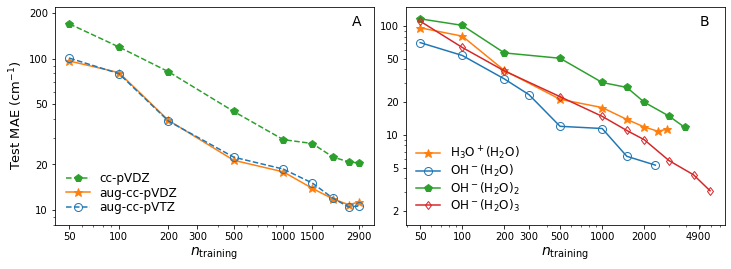

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.array(data['h5o2+/step']), np.array(data['h5o2+/dz/mae']), label='cc-pVDZ', marker='p', markersize=8, linestyle='--',color='C2')
ax[0].plot(np.array(data['h5o2+/step']), np.array(data['h5o2+/augdz/mae']), label='aug-cc-pVDZ', marker='*', markersize=9,color='C1')
ax[0].plot(np.array(data['h5o2+/step']), np.array(data['h5o2+/augtz/mae']), label='aug-cc-pVTZ', marker='o', markersize=8, linestyle='--', fillstyle='none',color='C0')
ax[1].plot(np.array(data['h5o2+/step']), np.array(data['h5o2+/augdz/mae']), label='H$_3$O$^+$(H$_2$O)', marker='*', markersize=9,color='C1')
ax[1].plot(np.array(data['h3o2-/step']), np.array(data['h3o2-/augdz/mae']), label='OH$^-$(H$_2$O)', markersize=8, marker='o', fillstyle='none',color='C0')
ax[1].plot(np.array(data['h5o3-/step']), np.array(data['h5o3-/augdz/mae']), label='OH$^-$(H$_2$O)$_2$', marker='p', markersize=8,color='C2')
ax[1].plot(np.array(data['h7o4-/step']), np.array(data['h7o4-/augdz/mae']), label='OH$^-$(H$_2$O)$_3$', marker='d', fillstyle='none',color='C3')

for i in range(2):
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].legend(frameon=False,fontsize=12,labelspacing=0.1,loc=3)
    ax[i].set_xlabel('$n_\mathregular{training}$',fontsize=14)
ax[0].set_xticks([50, 100, 200, 300, 500, 1000, 1500, 2900])
ax[0].set_xticklabels([50, 100, 200, 300, 500, 1000, 1500, 2900])
ax[1].set_xticks([50, 100, 200, 300, 500, 1000, 2000, 4900])
ax[1].set_xticklabels([50, 100, 200, 300, 500, 1000, 2000, 4900])
ax[0].set_yticks([200, 100, 50, 20, 10])
ax[0].set_yticklabels([200, 100, 50, 20, 10])
ax[1].set_yticks([100, 50, 20, 10, 5, 2])
ax[1].set_yticklabels([100, 50, 20, 10, 5, 2])
ax[0].set_ylabel('Test MAE (cm$^{-1}$)',fontsize=13)
ax[0].set_ylim([8,220])
ax[1].set_ylim([1.5,150])
ax[0].text(2600,165,'A',fontsize=14)
ax[1].text(5000,100,'B',fontsize=14)
# ax[0].text(100,180,'(a) H$_3$O$^+$(H$_2$O), different features',fontsize=14)
# ax[1].text(450,70,'(b) Different systems, \naug-cc-pVDZ features',fontsize=14)
plt.subplots_adjust(wspace=0.1,hspace=0.15)
plt.savefig('mobml_learning_curve.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
features_augdz = []
for i in range(3):
    data = h5py.File(f'h5o2/{"%05d"%i}/features.hdf5', 'r')['features']
    features_augdz.append(np.array(data['diag_augdz']))
features_augdz = np.vstack(features_augdz)
sele_feature = []
for i in range(709):
    if np.any(features_augdz[:,i]-features_augdz[0,i] != 0):
        sele_feature.append(i)
features_dz = []
features_augdz = []
features_augtz = []
for i in range(3000):
    data = h5py.File(f'h5o2/{"%05d"%i}/features.hdf5', 'r')['features']
    features_dz.append(np.array(data['diag_dz']))
    features_augdz.append(np.array(data['diag_augdz']))
    features_augtz.append(np.array(data['diag_augtz']))
features_dz = np.vstack(features_dz)[:, sele_feature]
features_augdz = np.vstack(features_augdz)[:, sele_feature]
features_augtz = np.vstack(features_augtz)[:, sele_feature]

In [ ]:
reducer = umap.UMAP(random_state=0)
embedding = reducer.fit_transform(features_augtz)
reducer1 = umap.UMAP(random_state=0)
embedding1 = reducer1.fit_transform(features_augdz)
reducer2 = umap.UMAP(random_state=0)
embedding2 = reducer2.fit_transform(features_dz)

In [ ]:
plt.figure(figsize=(8,6))
colors = sns.color_palette('icefire',12)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    alpha=0.2,
    s=4,
    c=colors[1]
)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    alpha=0.2,
    s=4,
    c=colors[4]
)
plt.scatter(
    embedding2[:, 0],
    embedding2[:, 1],
    alpha=0.2,
    s=4,
    c=colors[11]
)
plt.scatter(-100,0,label='aug-cc-pVTZ', s=12, c=colors[1])
plt.scatter(-100,0,label='aug-cc-pVDZ', s=12, c=colors[4])
plt.scatter(-100,0,label='cc-pVDZ', s=12, c=colors[11])
plt.xlim([-6,16])
plt.xlabel('Dimension 0', fontsize=16)
plt.ylabel('Dimension 1', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(frameon=False,fontsize=15,labelspacing=0.01)
plt.savefig('umap_h5o2_feature_quality.pdf', dpi=800, bbox_inches='tight')
plt.show()

In [50]:
## Error Distribution of MOB-ML
h_to_cm = 219474.6
h_to_kcal = 627.51
systems = ['h3o2', 'h5o2', 'h5o3', 'h7o4']
best_size = [1900, 2900, 3900, 5900]
correction = [-0.7354739817749305, -0.7278836701750038, -1.3510602199781658, -1.4483661225333435] #in Hartree

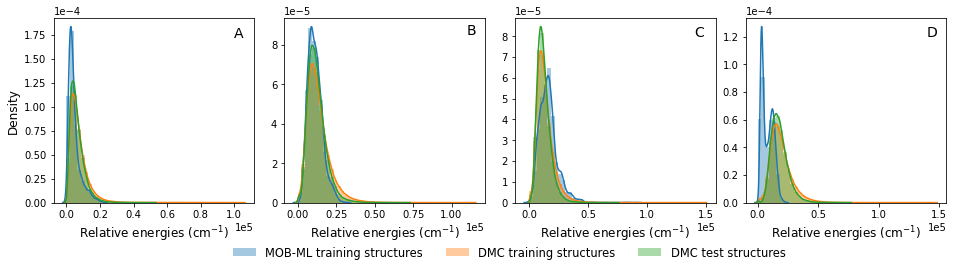

In [51]:
## Energy Distribution
mobml_data = {}
dmc_training_data = {}
dmc_test_data = {}
for i in systems:
    mobml_data[i] = pd.read_csv(f'csvs/{i}.csv')['ccsdt_cbs'].ravel()
    mobml_data[i] = h_to_cm*(mobml_data[i]-min(mobml_data[i]))
    dmc_training_data[i] = np.load(f'dmc_data/{i}_training_data.npy',allow_pickle=True).item()['energies']
    dmc_test_data[i] = np.load(f'dmc_data/{i}_test_data.npy',allow_pickle=True).item()['energies']

fig, ax = plt.subplots(1, 4, figsize=(16, 3.4))

for i in range(len(systems)):
    bins = np.linspace(0,max([max(mobml_data[systems[i]]),max(dmc_training_data[systems[i]]),max(dmc_test_data[systems[i]])]))
    ax[i].hist(mobml_data[systems[i]], bins=bins, label='MOB-ML training structures', alpha =0.4, density = True, color = 'C0')
    ax[i].hist(dmc_training_data[systems[i]],bins=bins, label='DMC training structures', alpha =0.4, density = True, color = 'C1')
    ax[i].hist(dmc_test_data[systems[i]], bins=bins, label='DMC test structures', alpha =0.4, density = True, color = 'C2')
    ax[i].set_xlabel('Relative energies (cm$^{-1}$)', fontsize=12)
    ax[i].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    if i !=0:
        ax[i].set_ylabel(' ', fontsize=12)
    sns.kdeplot(ax=ax[i], data=mobml_data[systems[i]], color = 'C0')
    sns.kdeplot(ax=ax[i], data=dmc_training_data[systems[i]], color = 'C1')
    sns.kdeplot(ax=ax[i], data=dmc_test_data[systems[i]], color = 'C2')
ax[0].legend(frameon=False,ncol=3, fontsize=11.5, labelspacing = 0.2, bbox_to_anchor=(3.5, -0.38, .2, .2))
plt.subplots_adjust(hspace=0.05, wspace=0.15)
ax[0].set_ylabel('Density', fontsize=12)
ax[0].text(100000,1.72e-4,'A',fontsize=14)
ax[1].text(110000,8.5e-5,'B',fontsize=14)
ax[2].text(140000,8e-5,'C',fontsize=14)
ax[3].text(140000,1.2e-4,'D',fontsize=14)
plt.savefig('si_sample_energies.pdf', dpi=80, bbox_inches='tight')
plt.show()